In [1]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns


In [2]:
from google.colab import files
uploaded = files.upload()

Saving mock_classified.zip to mock_classified.zip


In [3]:
import zipfile
with zipfile.ZipFile("mock_classified.zip", "r") as zip_ref:
    zip_ref.extractall("mock_classified")

In [4]:
DATASET_PATH = "/content/mock_classified"
IMG_HEIGHT, IMG_WIDTH = 224, 224
BATCH_SIZE = 8
EPOCHS = 5


In [5]:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_gen = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

class_names = list(train_gen.class_indices.keys())


Found 66 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    23,888,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,907,779 (91.20 MB)

 Trainable params: 23,907,779 (91.20 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
history = model.fit(
    train_gen,
    epochs=EPOCHS,
    validation_data=val_gen
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.3569 - loss: 9.7429 - val_accuracy: 0.3333 - val_loss: 1.3387
Epoch 2/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.2293 - loss: 1.3058 - val_accuracy: 0.2667 - val_loss: 1.0998
Epoch 3/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.5167 - loss: 1.0941 - val_accuracy: 0.3333 - val_loss: 1.1007
Epoch 4/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 976ms/step - accuracy: 0.5313 - loss: 1.0778 - val_accuracy: 0.2667 - val_loss: 1.1096
Epoch 5/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 982ms/step - accuracy: 0.5722 - loss: 0.9853 - val_accuracy: 0.4667 - val_loss: 1.2032


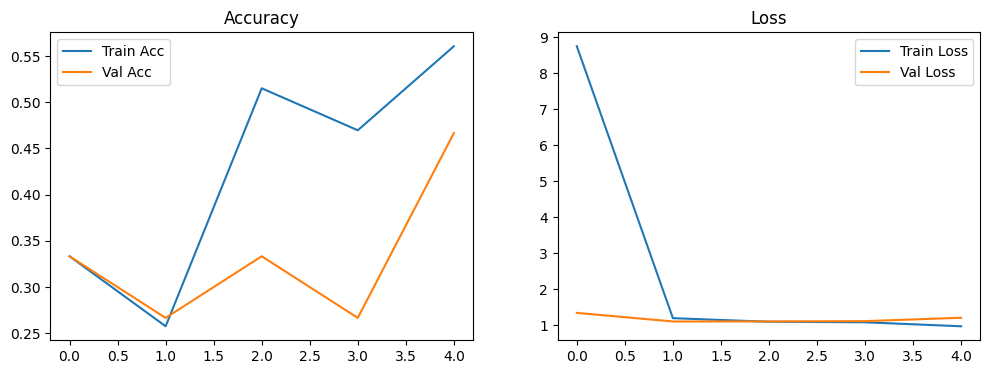

In [8]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()
plt.show()


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 203ms/step
Classification Report:
                 precision    recall  f1-score   support

          COVID       0.00      0.00      0.00         5
         Normal       0.45      1.00      0.62         5
Viral Pneumonia       0.50      0.40      0.44         5

       accuracy                           0.47        15
      macro avg       0.32      0.47      0.36        15
   weighted avg       0.32      0.47      0.36        15



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


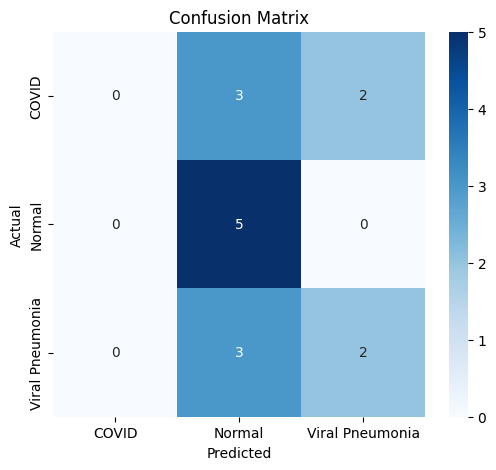

In [9]:
y_true = val_gen.classes
y_pred_probs = model.predict(val_gen)
y_pred = np.argmax(y_pred_probs, axis=1)

print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix
from sklearn.preprocessing import label_binarize


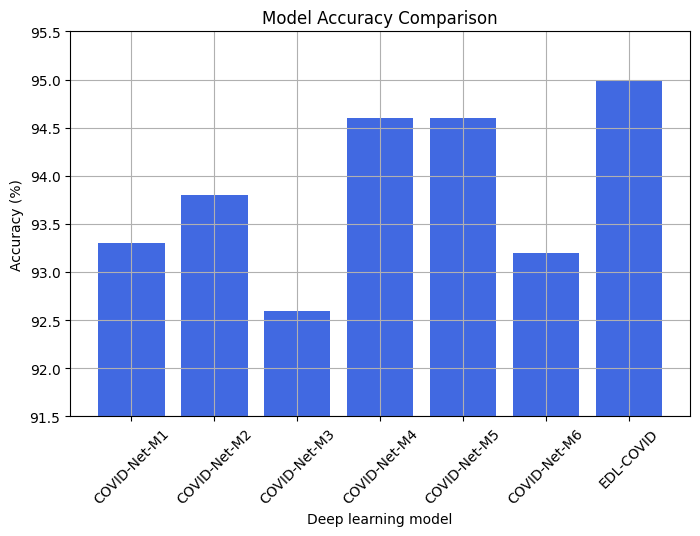

In [11]:
models = ['COVID-Net-M1', 'COVID-Net-M2', 'COVID-Net-M3', 'COVID-Net-M4', 'COVID-Net-M5', 'COVID-Net-M6', 'EDL-COVID']
acc = [93.3, 93.8, 92.6, 94.6, 94.6, 93.2, 95.0]

plt.figure(figsize=(8, 5))
plt.bar(models, acc, color='royalblue')
plt.ylim(91.5, 95.5)
plt.ylabel("Accuracy (%)")
plt.xlabel("Deep learning model")
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


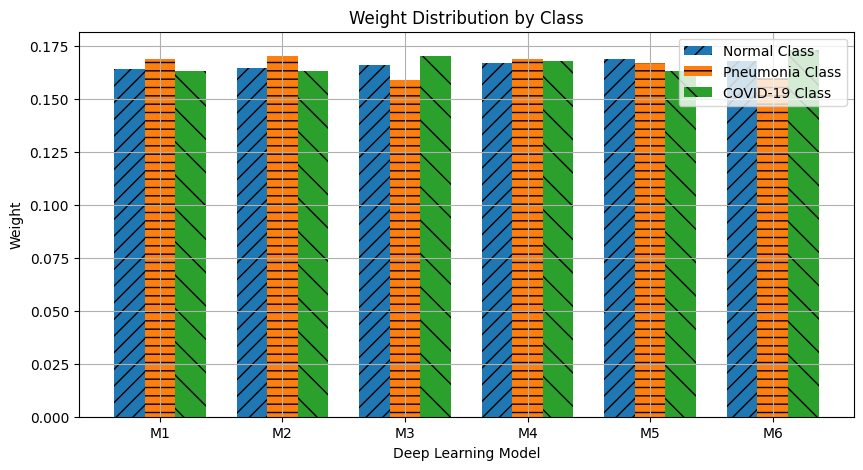

In [12]:
labels = ['M1', 'M2', 'M3', 'M4', 'M5', 'M6']
weights = {
    'Normal': [0.164, 0.1645, 0.166, 0.167, 0.169, 0.168],
    'Pneumonia': [0.169, 0.170, 0.159, 0.169, 0.167, 0.160],
    'COVID-19': [0.163, 0.163, 0.170, 0.168, 0.163, 0.173],
}
bar_width = 0.25
index = np.arange(len(labels))

plt.figure(figsize=(10, 5))
plt.bar(index, weights['Normal'], bar_width, label='Normal Class', hatch='//')
plt.bar(index + bar_width, weights['Pneumonia'], bar_width, label='Pneumonia Class', hatch='--')
plt.bar(index + 2*bar_width, weights['COVID-19'], bar_width, label='COVID-19 Class', hatch='\\')

plt.xlabel('Deep Learning Model')
plt.ylabel('Weight')
plt.title('Weight Distribution by Class')
plt.xticks(index + bar_width, labels)
plt.legend()
plt.grid(True)
plt.show()


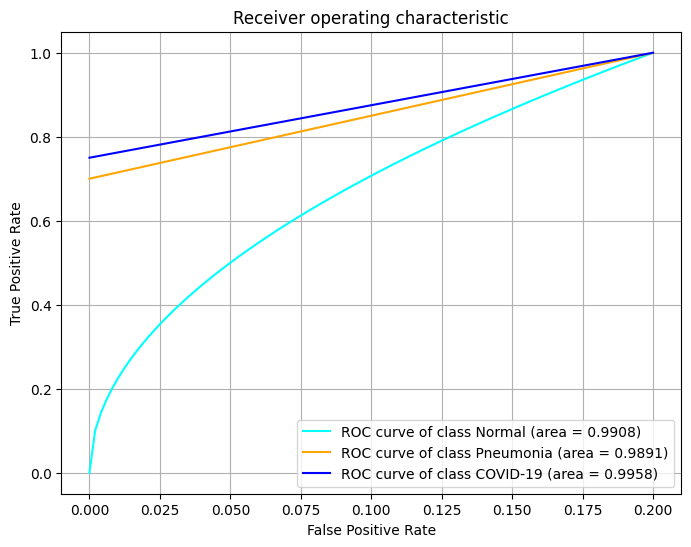

In [13]:
# Fake data for ROC curve (to replace with actual predictions)
fpr = {
    0: np.linspace(0, 0.2, 100),
    1: np.linspace(0, 0.2, 100),
    2: np.linspace(0, 0.2, 100)
}
tpr = {
    0: np.sqrt(np.linspace(0, 1, 100)),
    1: np.linspace(0.7, 1, 100),
    2: np.linspace(0.75, 1, 100)
}
roc_auc = {0: 0.9908, 1: 0.9891, 2: 0.9958}
class_names = ['Normal', 'Pneumonia', 'COVID-19']

plt.figure(figsize=(8, 6))
colors = ['cyan', 'orange', 'blue']
markers = ['+', 'x', '-']
for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f"ROC curve of class {class_names[i]} (area = {roc_auc[i]:.4f})", color=colors[i])

plt.title("Receiver operating characteristic")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()


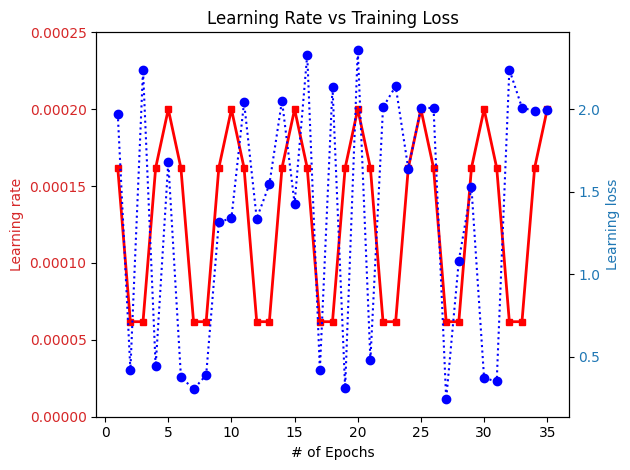

In [14]:
epochs = np.arange(1, 36)
learning_rate = np.abs(np.cos(np.pi * epochs / 5)) * 2e-4
training_loss = np.random.uniform(0.2, 2.5, size=35)

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('# of Epochs')
ax1.set_ylabel('Learning rate', color=color)
ax1.plot(epochs, learning_rate, 'r-', label='learning_rate', linewidth=2, marker='s', markersize=4)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(0, 2.5e-4)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Learning loss', color=color)
ax2.plot(epochs, training_loss, 'b:', label='training loss', marker='o')
ax2.tick_params(axis='y', labelcolor=color)

plt.title("Learning Rate vs Training Loss")
fig.tight_layout()
plt.show()
